### Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [17]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
import pandas as pd
import numpy as np
import sweetviz as sv
import IPython
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
import pickle




In [3]:
df=pd.read_csv('data/BankNote_Authentication.csv')

In [4]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
# Analyze a single DataFrame
report = sv.analyze(df)

# Generate and show the report
report.show_html('report.html')

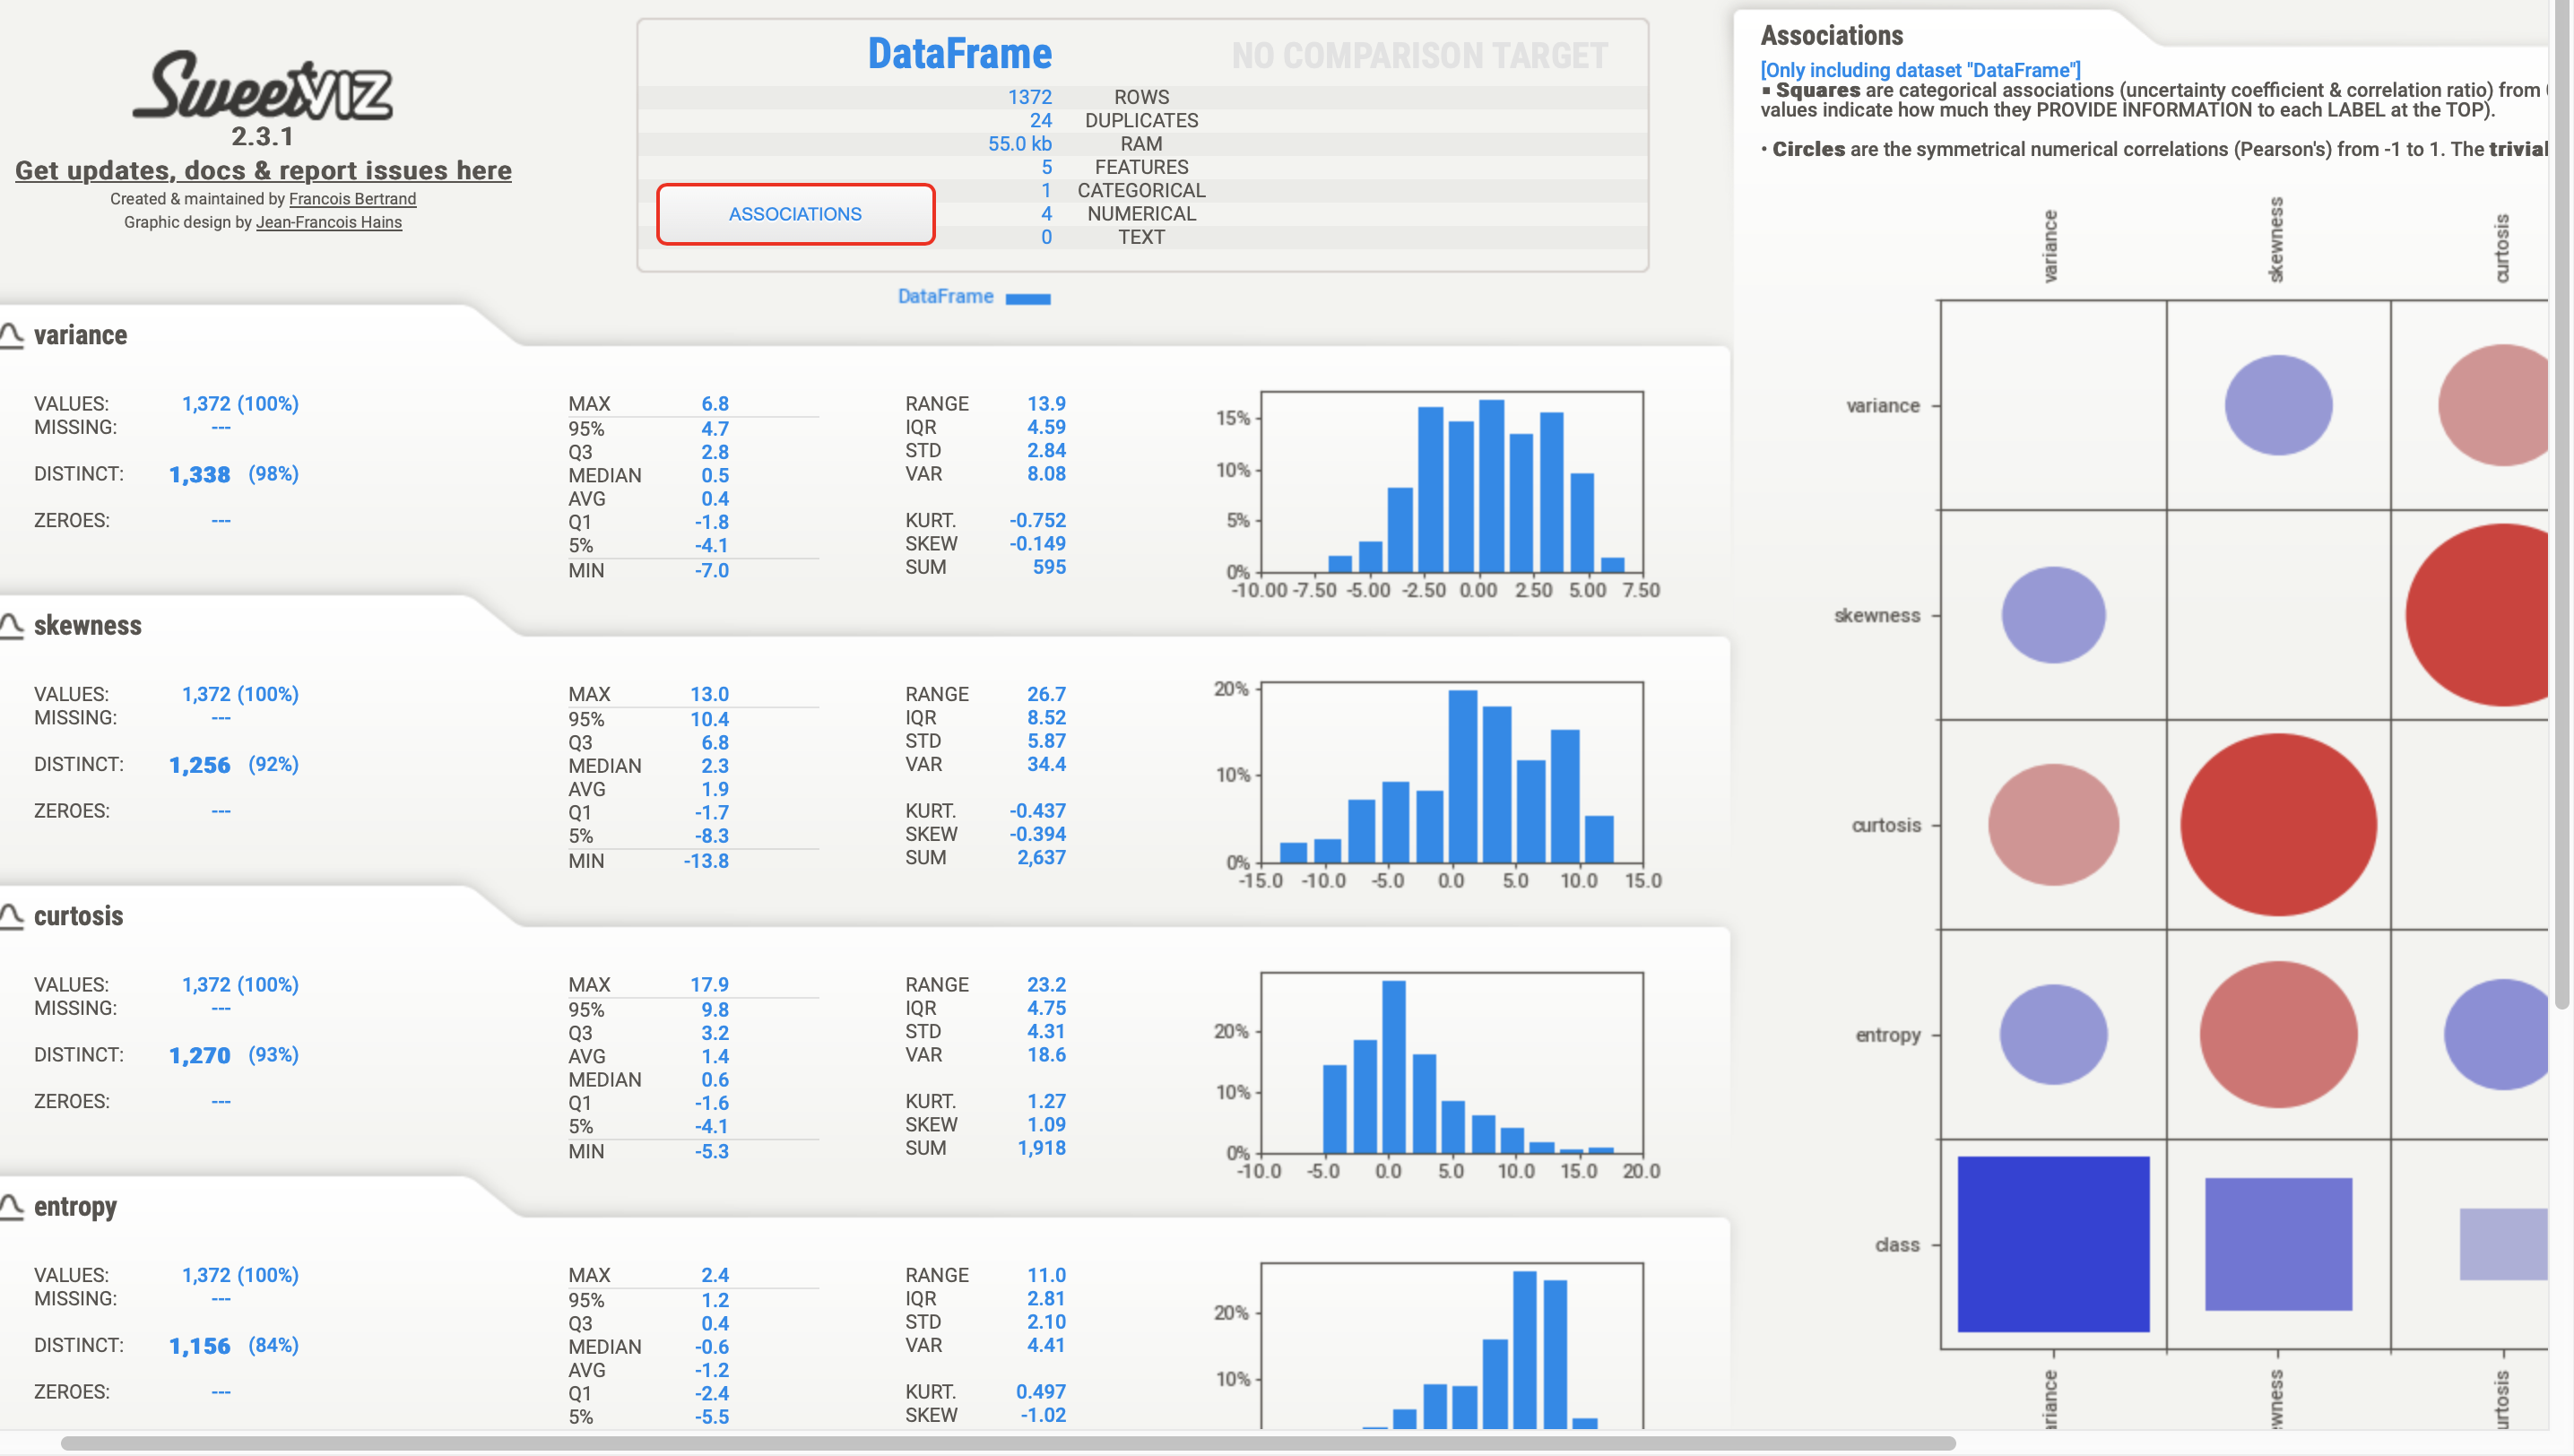

In [19]:
from IPython.display import Image, display
display(Image(filename='image/Screenshot 2024-03-11 at 11.34.24 AM.png'))


In [5]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [7]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: class, dtype: int64

In [ ]:
import sweetviz as sv

# Assuming `train_df` is your training dataset and `test_df` is your test dataset
compare_report = sv.compare([X, "Training Data"], [y, "Test Data"])

# Generate and show the comparison report
compare_report.show_html('comparison_report.html')


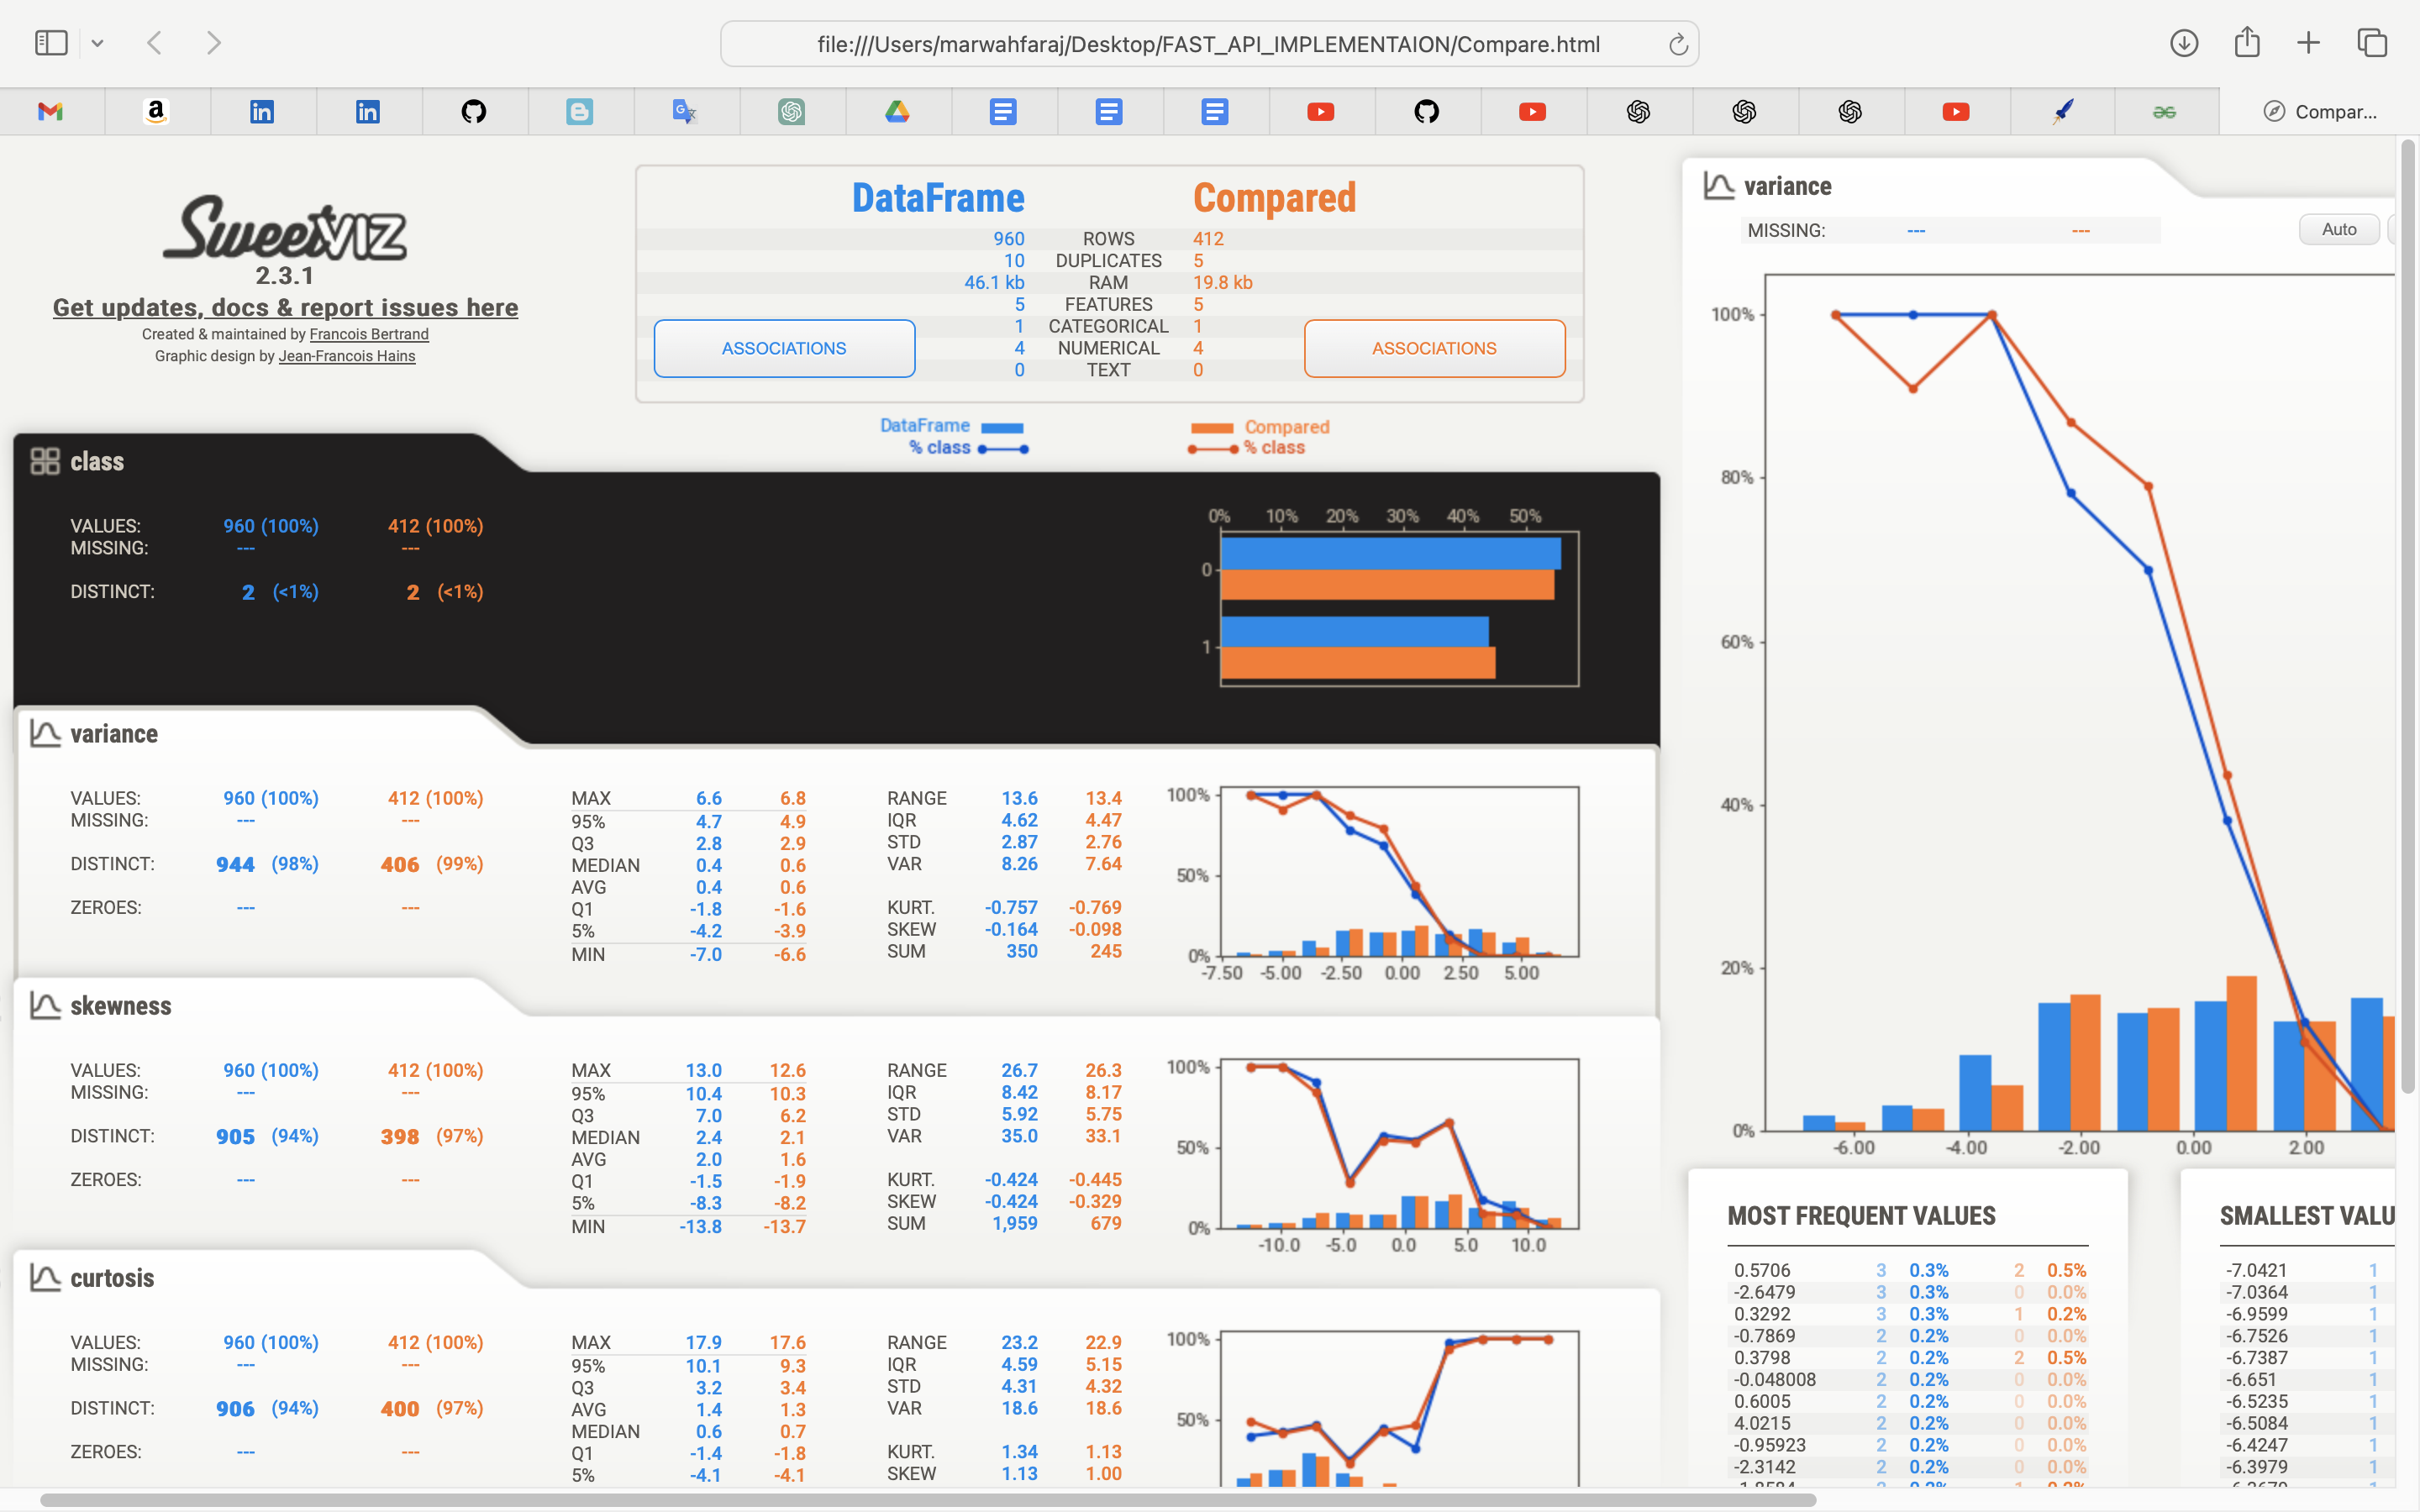

In [21]:
from IPython.display import Image, display
display(Image(filename='image/Screenshot 2024-03-11 at 11.20.00 AM.png'))


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
### Implement Random Forest classifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
## Prediction
y_pred=classifier.predict(X_test)

In [12]:
### Check Accuracy
score=accuracy_score(y_test,y_pred)

In [13]:
score

0.9902912621359223

In [14]:
# Initialize and fit LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print results
print(models)

100%|██████████| 29/29 [00:01<00:00, 26.90it/s]

[LightGBM] [Info] Number of positive: 430, number of negative: 530
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447917 -> initscore=-0.209092
[LightGBM] [Info] Start training from score -0.209092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                    

In [15]:
### Create a Pickle file using serialization 
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [14]:
import numpy as np

In [16]:
classifier.predict([[2,3,4,1]])

array([0])